In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import date, datetime, timedelta
import os

def getData(data_type:str ):# 'confirmed', 'deaths', 'recovered'
    url = f"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data" \
          f"/csse_covid_19_time_series/time_series_covid19_{data_type}_global.csv"
    return pd.read_csv(url, error_bad_lines=False)


def format_date(date: datetime.date):
    if os.name == "nt":
        return date.strftime('%#m/%#d/%y')
    else:
        return date.strftime('%-m/%-d/%y')

confirmed 1638
recovered 7
deaths 18


In [4]:
def dailyIncrease(data_type:str,country:str,after_first_confirmed=True):#type-> 'confirmed', 'deaths', 'recovered
    df = getData(data_type)
    df = df[df['Country/Region']==country].groupby('Country/Region').sum().loc[:,'1/22/20':]
    df = df.T.loc[(df>0).any()].T if after_first_confirmed else df.T
    return (df - df.shift(periods=1,axis=1).fillna(value=0)).T


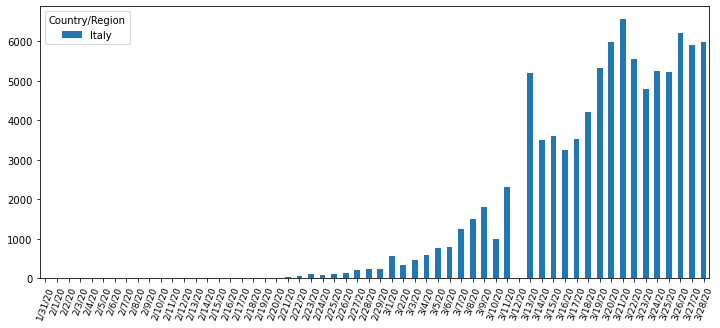

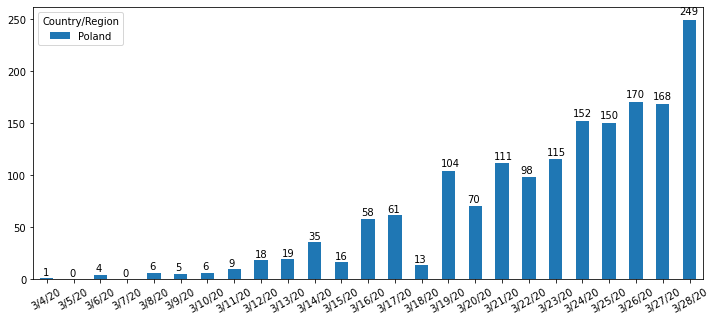

In [5]:
diI=dailyIncrease('confirmed','Italy')

ax = diI.plot(kind='bar',figsize=(12,5))
ax.tick_params(axis='x',labelrotation=70,labelsize=9)

diP=dailyIncrease('confirmed','Poland')
ax = diP.plot(kind='bar',figsize=(12,5))
ax.tick_params(axis='x',labelrotation=30,labelsize=10)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()*0.99+0.1, p.get_height()*1.01 +3))


SyntaxError: EOL while scanning string literal (<ipython-input-399-249136d4ca8c>, line 32)

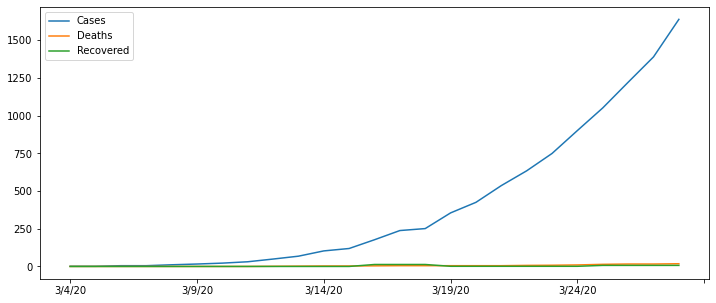

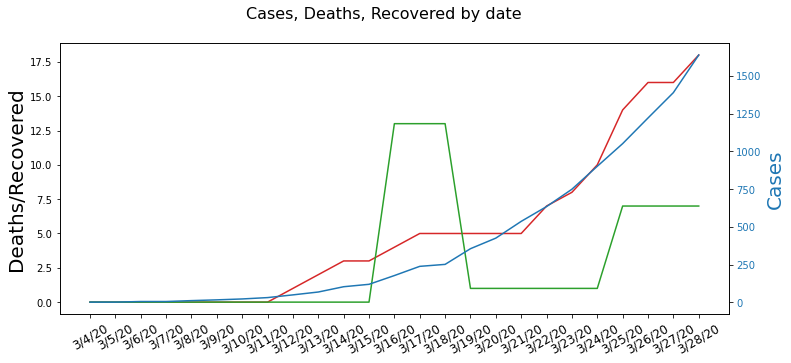

In [6]:
dfC = getData('confirmed')
dfD = getData('deaths')
dfR = getData('recovered')
poland_cases = dfC[dfC['Country/Region']=='Poland'].loc[:,'1/22/20':]
poland_cases  = poland_cases.T.loc[(poland_cases!=0).any()]
cases_index= list(poland_cases.index)
poland_deaths = dfD[dfD['Country/Region']=='Poland'][cases_index].T
poland_recovered = dfR[dfR['Country/Region']=='Poland'][cases_index].T

poland_deaths.columns=['Deaths']
poland_cases.columns=['Cases']
poland_recovered.columns=['Recovered']
combined=pd.concat([poland_cases,poland_deaths,poland_recovered],axis=1).plot(figsize=(12,5))

fig,de = plt.subplots()

de.set_ylabel('Deaths/Recovered',fontsize=20)
de.plot(poland_deaths,color='tab:red')
de.tick_params(axis='x',labelrotation=30,labelsize=12)

re=plt.subplot(de)
re.plot(poland_recovered,color='tab:green')

ca = de.twinx()
ca.set_ylabel('Cases',fontsize=20,color='tab:blue')
ca.plot(poland_cases)
ca.tick_params(axis='y',labelcolor='tab:blue')

fig.suptitle('Cases, Deaths, Recovered by date', fontsize=16)
fig.tight_layout(pad=33.0)
fig.set_size_inches(12,5)
plt.show()
